In [1]:
import requests
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

API_URL = "https://api.covid19api.com/country/poland?from=2020-03-01T00:00:00Z&to=2021-12-01T00:00:00Z"

In [2]:
response = requests.get(API_URL)
raw = json.loads(response.content.decode("utf8"))
print(raw[0], raw[-1])

{'ID': '49358c6d-8c73-4867-bfb4-d01b62371877', 'Country': 'Poland', 'CountryCode': 'PL', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '51.92', 'Lon': '19.15', 'Confirmed': 0, 'Deaths': 0, 'Recovered': 0, 'Active': 0, 'Date': '2020-03-01T00:00:00Z'} {'ID': '0a167ceb-05af-415b-8f3f-05d69565184e', 'Country': 'Poland', 'CountryCode': 'PL', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '51.92', 'Lon': '19.15', 'Confirmed': 3569137, 'Deaths': 84153, 'Recovered': 0, 'Active': 3484984, 'Date': '2021-12-01T00:00:00Z'}


,CountryCode,Confirmed,Deaths,Active,Recovered,NewCases,Date
636,PL,3487254,82986,3404268,0,25809.0,2021-11-27 00:00:00+00:00
637,PL,3507828,83037,3424791,0,20523.0,2021-11-28 00:00:00+00:00
638,PL,3520961,83055,3437906,0,13115.0,2021-11-29 00:00:00+00:00
639,PL,3540061,83583,3456478,0,18572.0,2021-11-30 00:00:00+00:00
640,PL,3569137,84153,3484984,0,28506.0,2021-12-01 00:00:00+00:00


          Confirmed        Deaths     Recovered        Active      NewCases
count  6.410000e+02    641.000000  6.410000e+02  6.410000e+02  6.400000e+02
mean   1.452338e+06  36041.193448  7.603938e+05  6.558944e+05  5.445288e+03
std    1.272583e+06  32512.910955  1.005324e+06  1.093734e+06  1.050425e+05
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00 -2.101800e+04
25%    5.116700e+04   1800.000000  3.750000e+02  1.329000e+04 -1.647500e+02
50%    1.422320e+06  32844.000000  6.331200e+04  1.760790e+05  1.535000e+02
75%    2.879336e+06  74917.000000  1.397342e+06  3.545560e+05  1.121750e+03
max    3.569137e+06  84153.000000  2.653981e+06  3.484984e+06  2.654151e+06


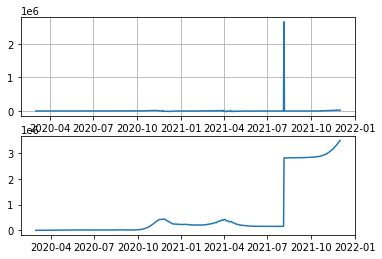

In [3]:
df = pd.DataFrame.from_records(raw)
df['NewCases'] = df['Active'].diff(1)
df['Date'] = pd.to_datetime(df['Date'])

display(df[['CountryCode', 'Confirmed', 'Deaths', 'Active', 'Recovered', 'NewCases', 'Date']][-5:])

plt.figure(1)
plt.subplot(211)
plt.grid(True)
plt.plot(df['Date'], df['NewCases'])
plt.subplot(212)
plt.plot(df['Date'], df['Active'])
print(df.describe())
plt.show()

/home/tooster/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


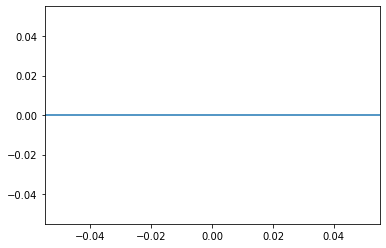

In [4]:
plt.acorr(df['NewCases'])
plt.show()